In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


© 2024 Liew Choy Yein

---


#Project Title: Building Simple Dictionary

##Project Specification :
A simple dictionary is a reference tool that provides concise definitions of words. It is designed to be easy to understand, often using basic vocabulary to explain complex terms.

In this documentation, I will discuss the various features in Simple Dictionary program. I will explain how this program works and the detail algorithm on how it works to convenient the user. I will also examine the constraints and assumptions of the program.

##Problem Analysis

The program is to design to allow users to interact with a dictionary through a menu. The dictionary is initially loaded from an input file and the program should provide functionalities for searching words, adding new words and displaying the content of the dictionary. The program should also rearrange the dictionary for better search capabilities. The output of the program should be at least one dictionary file.

*  Input : Input file that contains the initial dictionary. The user
interact with the program through a menu and provide inputs for searching words, adding new words and choosing other functionalities.

*  Process : Rearrange input file according to alphabetical order then implement function such as search word, add new words and sort without array based on user's input.

*  Output : At least one dictionary file be created, where the dictionary file should include an index number, the word’s initials, the word itself, and its meaning. The program should also display the content of the dictionary to the terminal.

**Specification of the Requirements:**

The program is designed to manage a dictionary stored in an input file. It starts by reading the file and storing its contents in suitable variable. If the file cannot be opened, it prints “input file cannot be opened”.

Before the user starts searching for words, the program rearranges the dictionary. It begins by finding the smallest word in the input file and storing it in the output file. This process continues, each time finding the next smallest word from the remaining words in the input file until all words are stored in the output file. This results in a sorted list of words in the dictionary without using arrays.

The program should offers a search feature for users to find the meanings of specific words. If a word is not found, the program provides suitable feedback and prompts the user to continue searching. The program use while loop for user to search for words continually.

Additionally, the program includes a menu option to display the dictionary’s content in the terminal. When this option is chosen, the program prints all the words and their meanings  to terminal from output file.

Lastly, the program allows users to add new words and their meanings to the dictionary. It accepts user input, updates the input file dictionary with the new input, sorts the input file again and stores the sorted dictionary in the output file. This ensures the dictionary is always up-to-date and sorted.


**Constraints And Assumption:**

1. The program must not use array, function, pointers or vector.

2. The input file must be in fixed format.

3. If the input file has more than one repeated word but different meaning, one of the repeated word will be remained but different meaning will be stored.

4. The program only stop when user chooses the option to stop.

5. When the user inputs an invalid option, the program should provide suitable feedback and prompt the user to give a suitable option.

#Programming Design & Solution

The program first reads the content of the "dictionary.txt" file and calculates the number of lines in the file. Then rearranges the words in alphabetical order and writes the sorted content to the "sortdictionary.txt" file.

After rearrange the dictionary, the program enters a menu prompt loop where the user can choose from the following options:
1. Search word's meaning
2. Add new word and meaning
3. Display content of dictionary
4. Exit

For option 1, the program allows the user to search for a word's meaning by reading the sorted dictionary file and displaying the meaning if the word is found. If the word is not found, the program prompts the user to add the word to the dictionary.

For option 2, the program allows the user to add new words and their meanings to the dictionary. Then, the program saves the new words in input file, rearranges the dictionary and prompts the user to save the changes.

For option 3, the program displays the content of the sorted dictionary file.

For option 4, the program exits the menu prompt loop and ends the program.


**Pseudocode :**
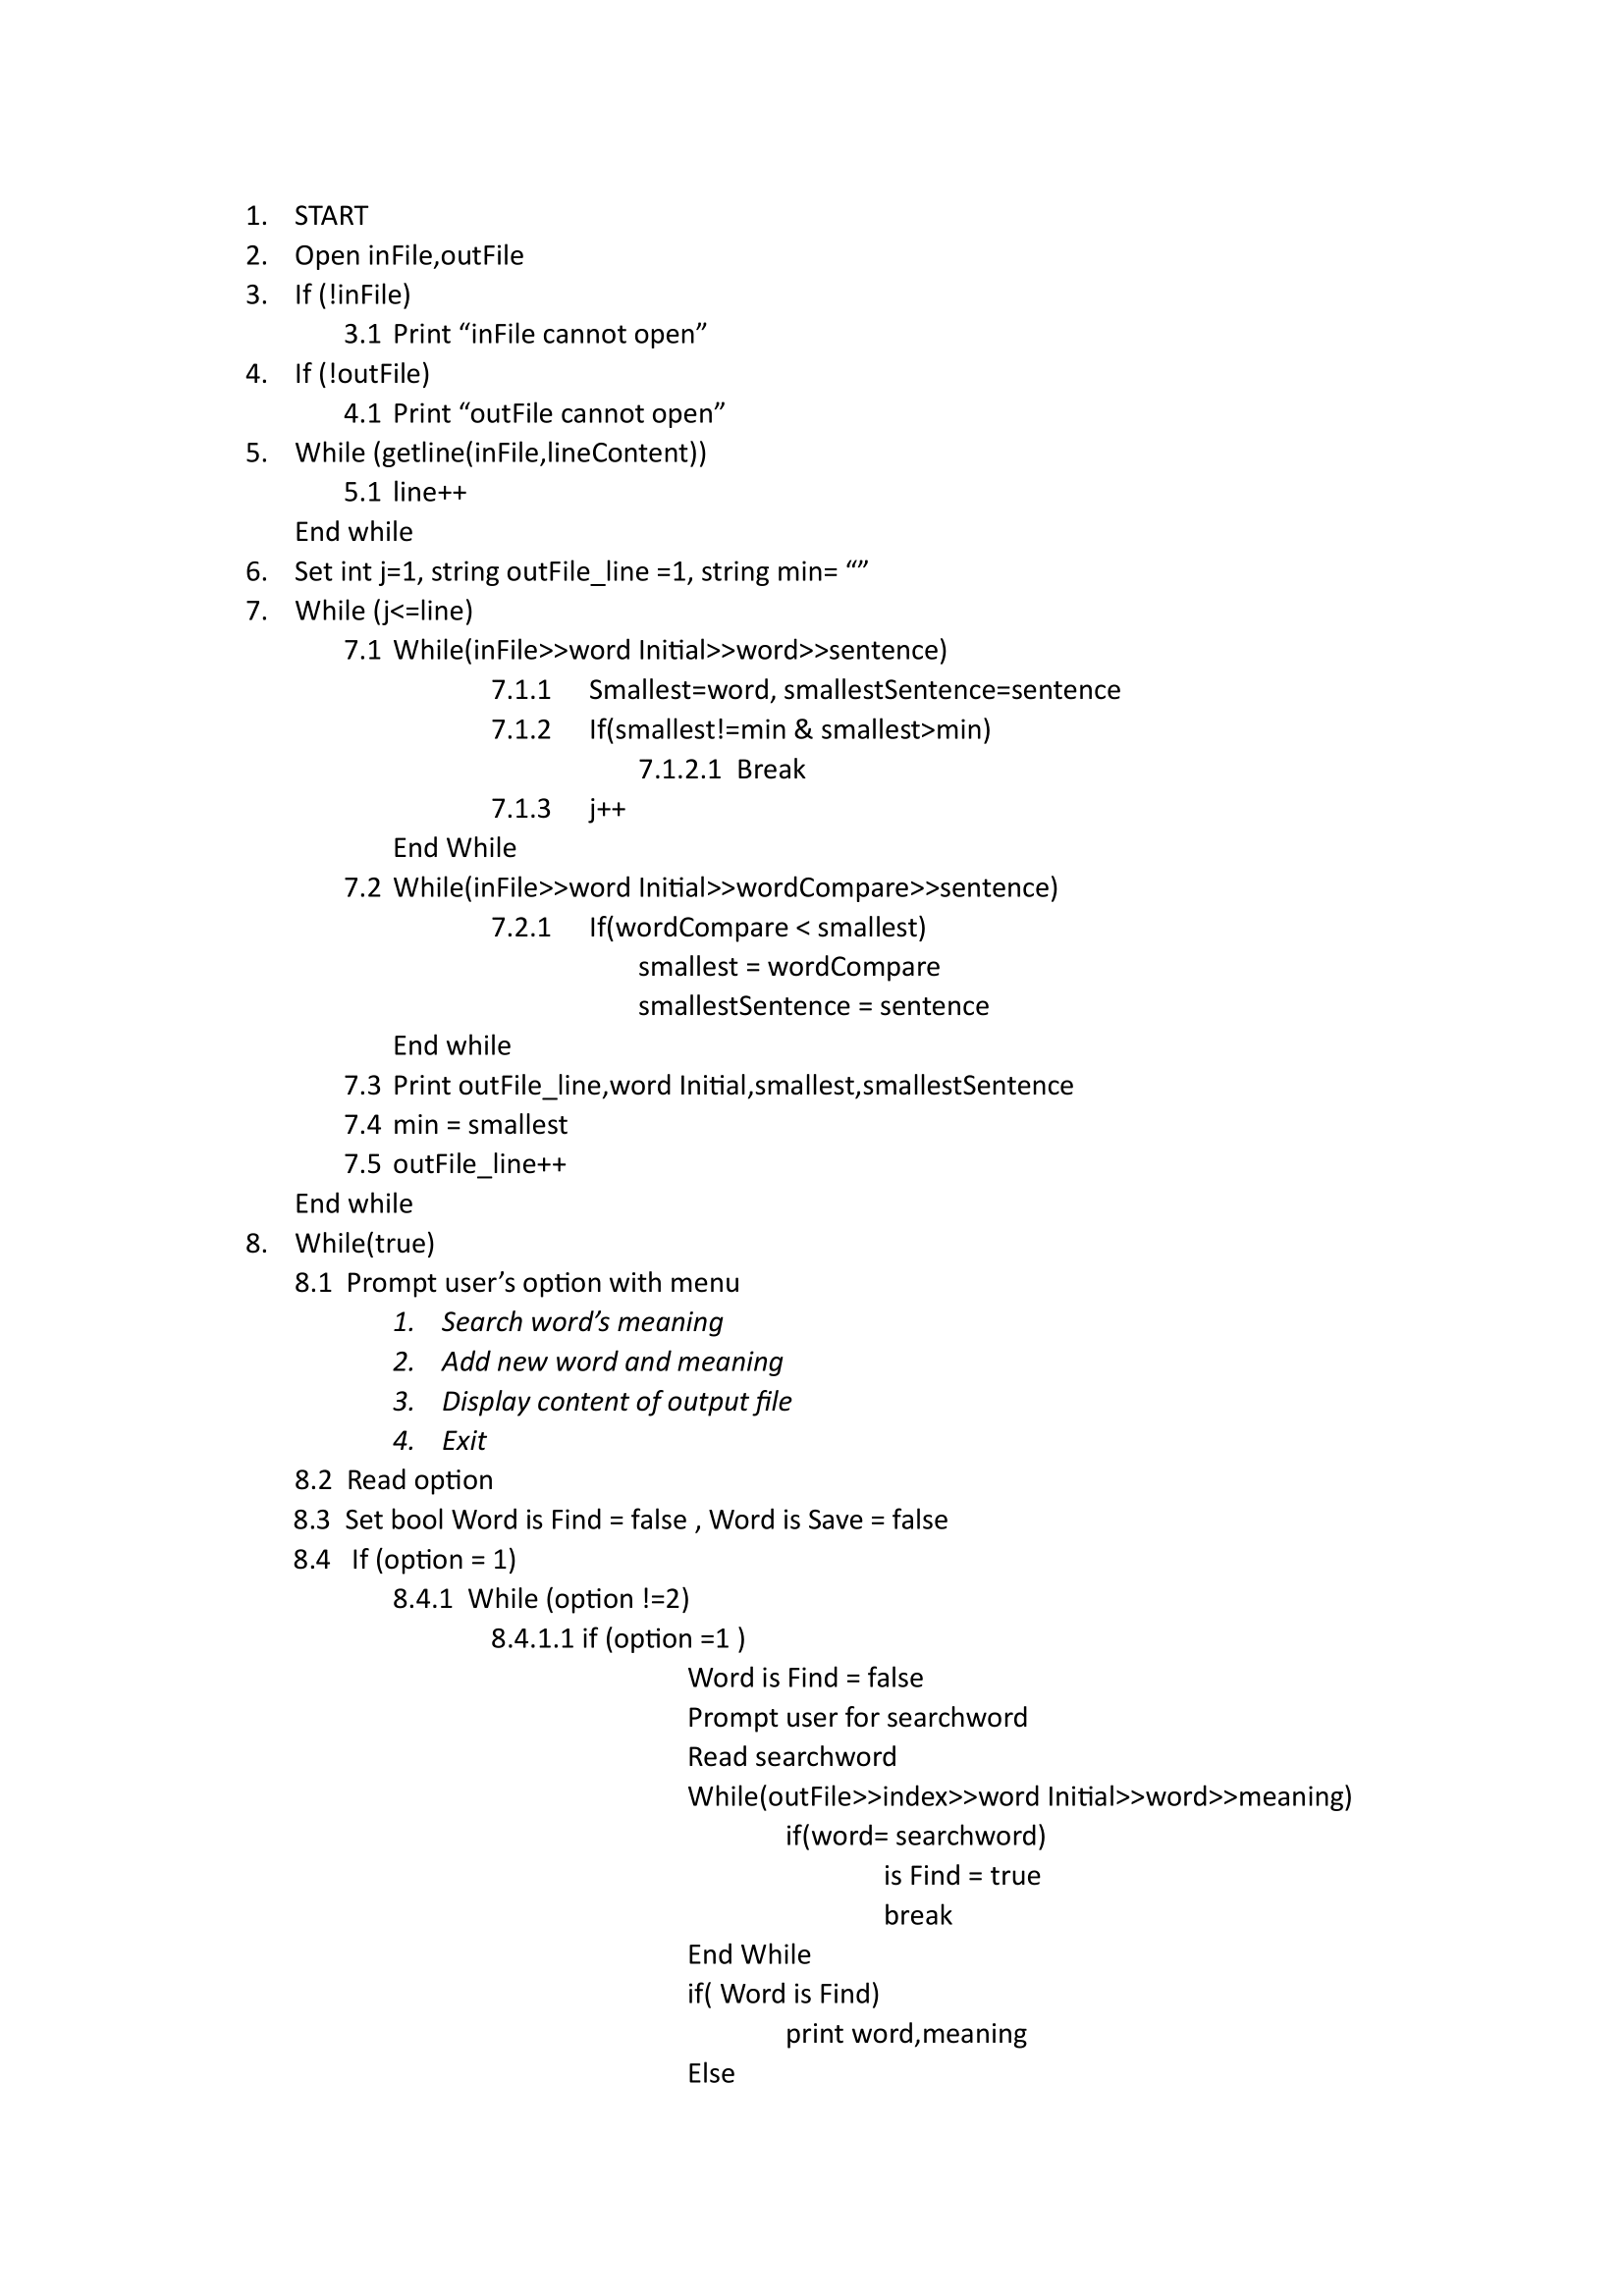

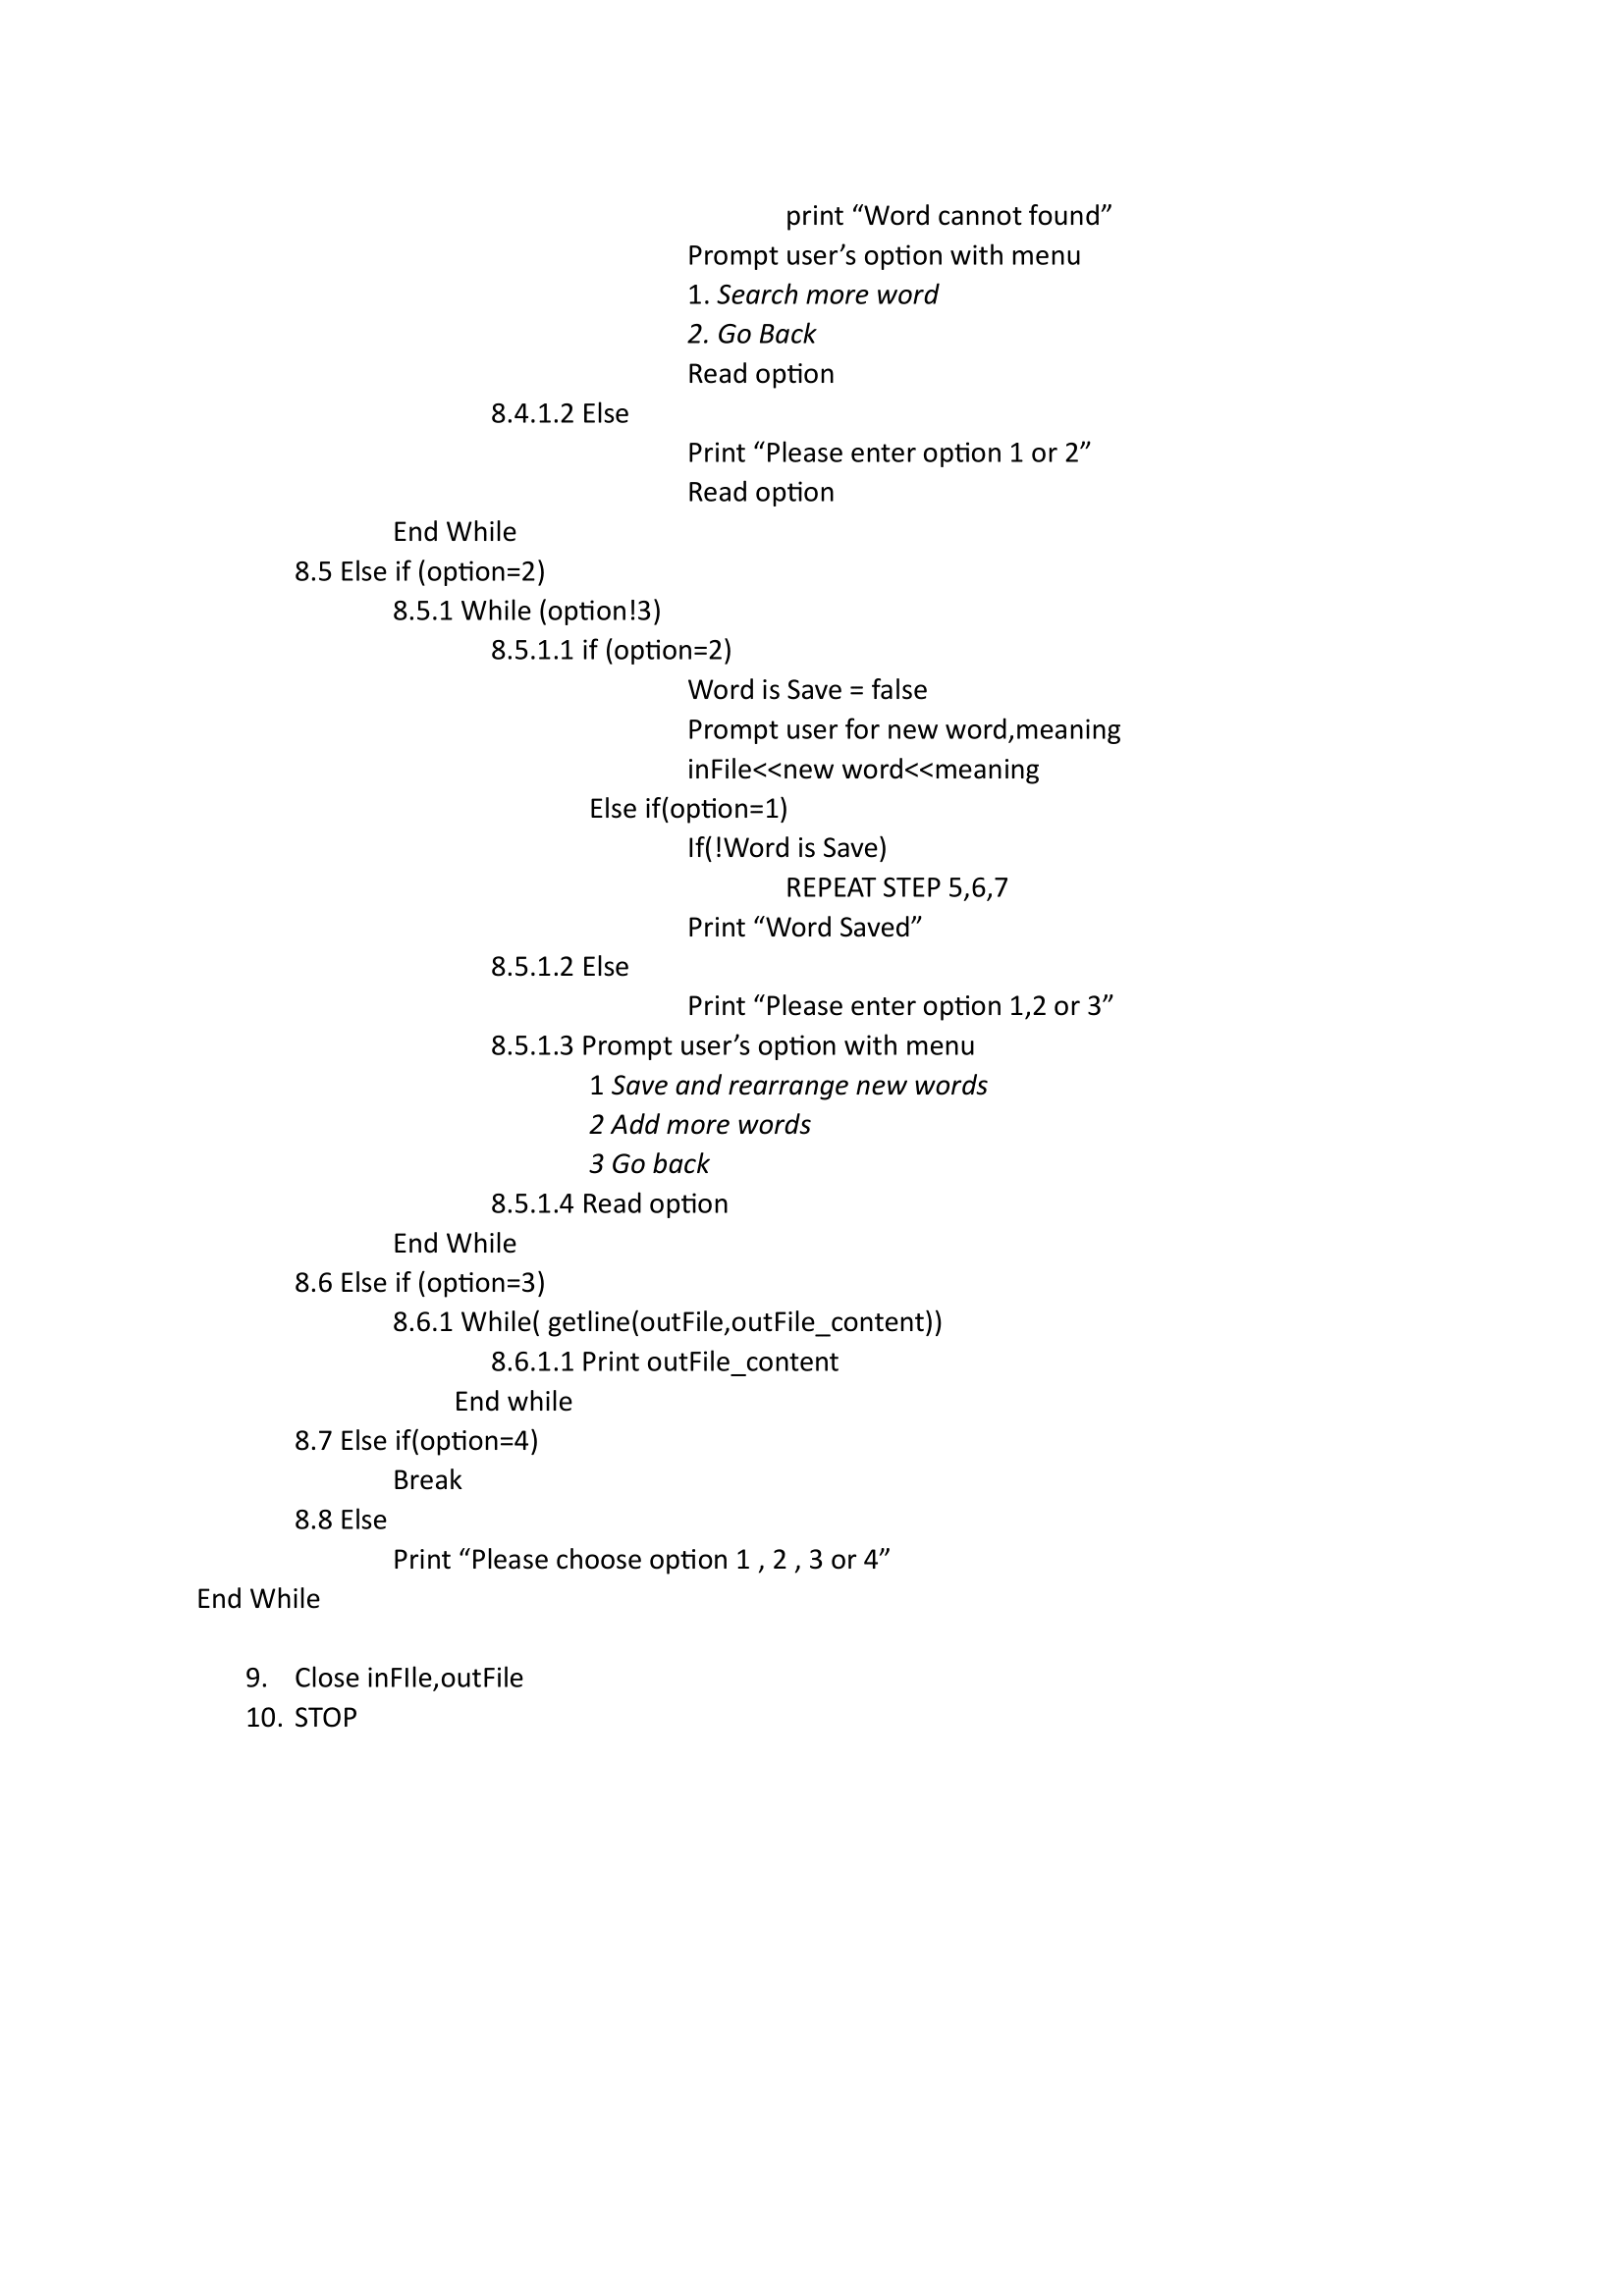


Flowchart :

*The red container is rearrangement part (sort without array) of input File dictionary and it will be repeated when user save new words and its meaning.

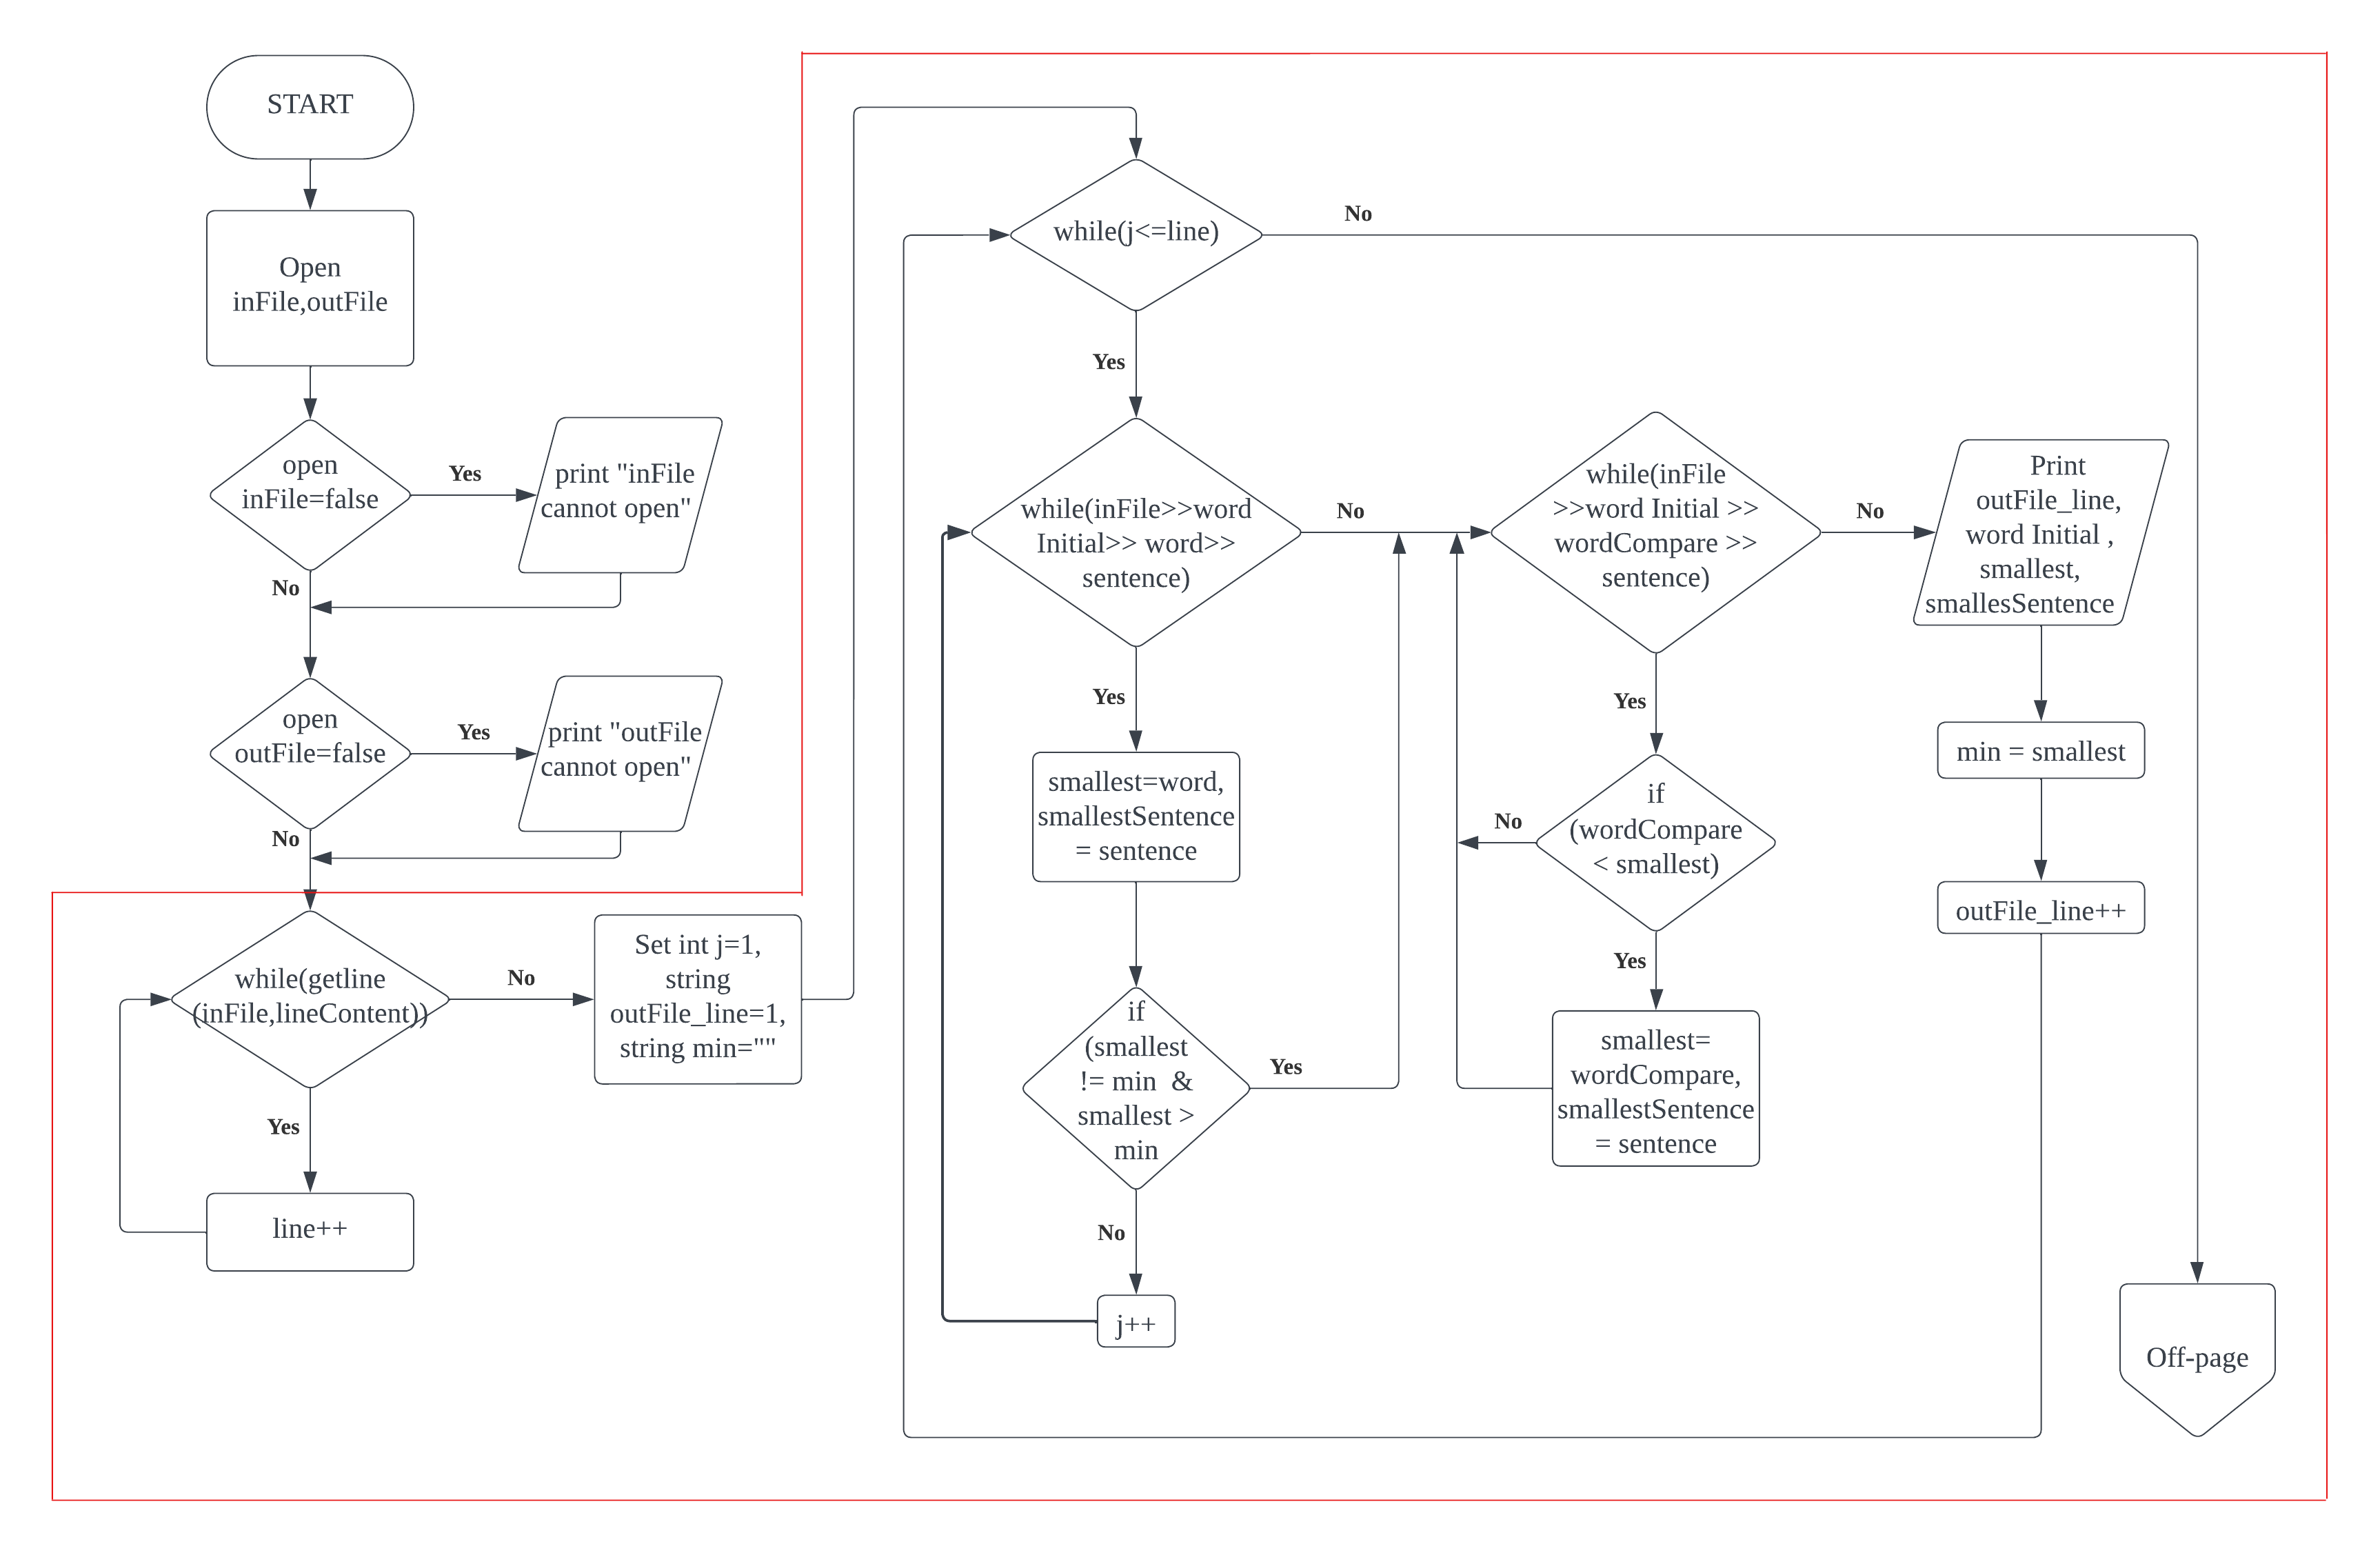

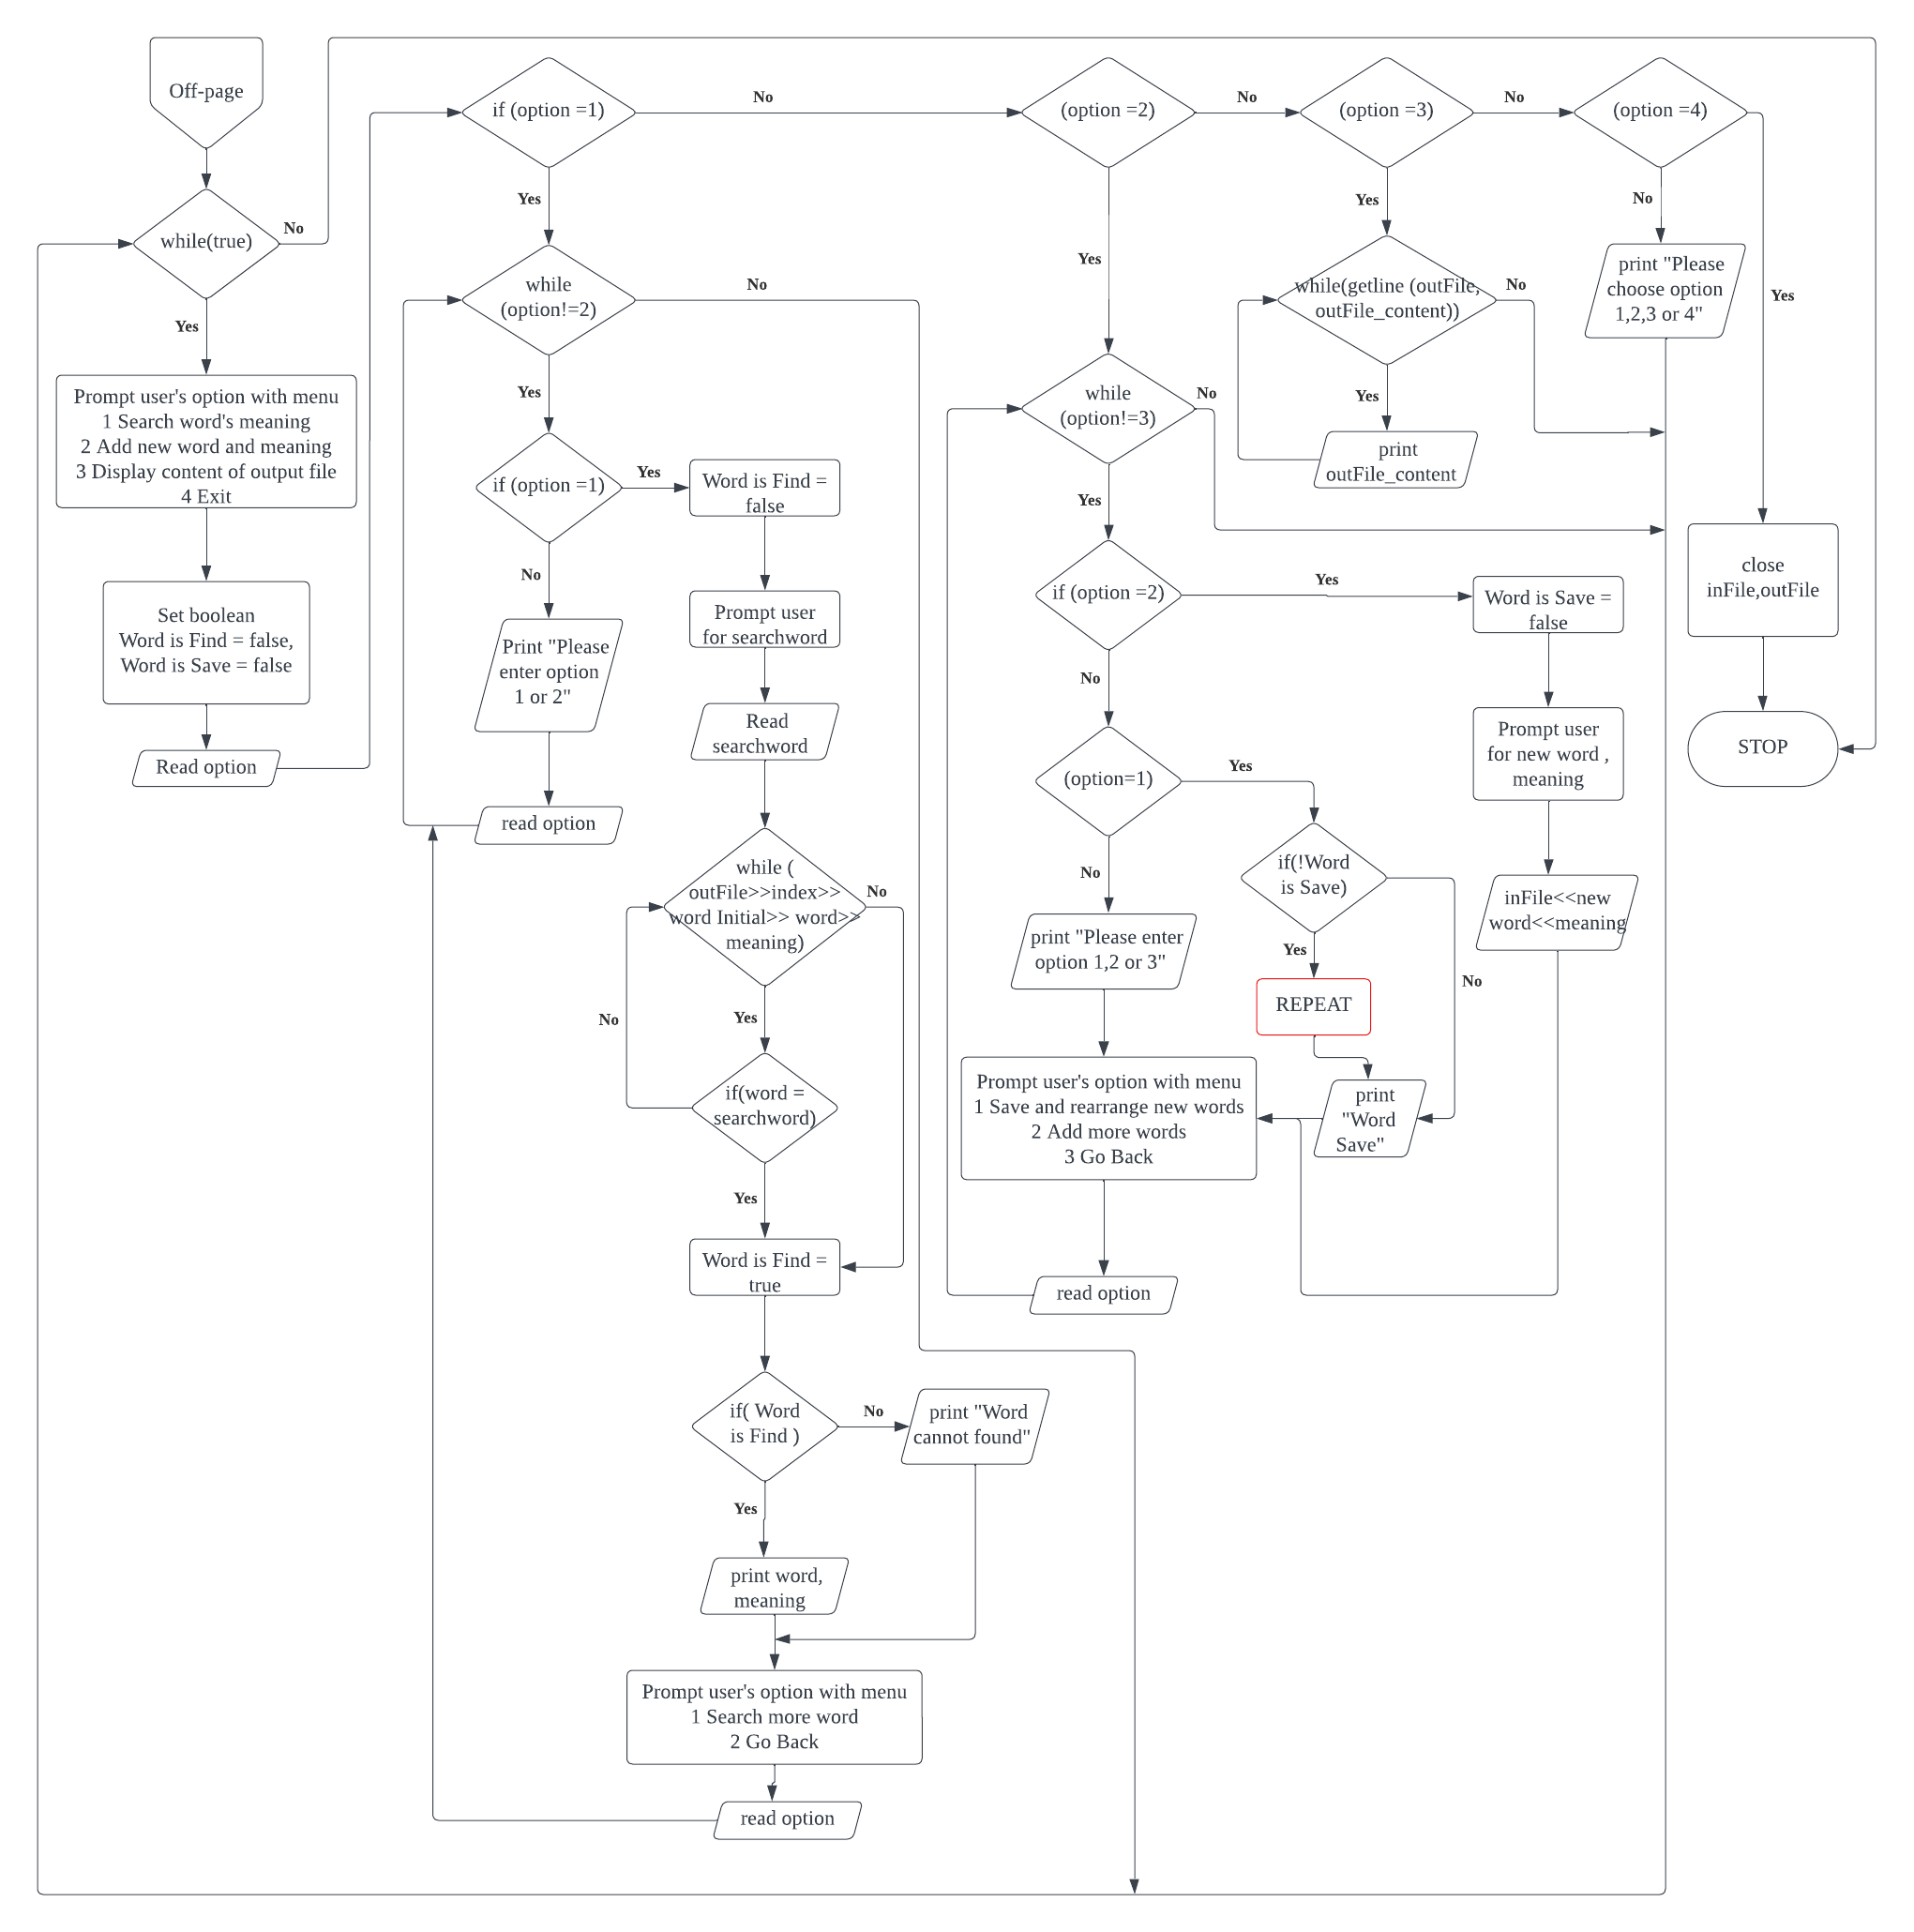


Flowchart diagram is [here](https://drive.google.com/file/d/1Dh8gvF_OC4dzrQbfFQ52tzNI58tlpXji/view?usp=sharing).

pseudocode is [here](https://drive.google.com/file/d/11CRbOsnYbfP36DAIzHr-Qx6oriqyDukK/view?usp=sharing).

Below is the input file:

In [ ]:
%%writefile initialDictionary.txt
Time	The indefinite continued progress of existence.
People	Human beings in general or considered collectively.
Work	Activity involving mental or physical effort done to achieve a purpose.
Life	The condition that distinguishes living organisms from inanimate matter.
Way	A method, style, or manner of doing something.
Day	A period of 24 hours, especially as a unit of time.
Year	The time taken by the Earth to make one revolution around the sun.
Good	To be desired or approved of; having positive qualities.
Man	An adult human male.
Woman	An adult human female.
Love	An intense feeling of deep affection or a great interest or pleasure in something.
Home	The place where one lives or resides, typically with one's family.
Family	A group of individuals living together and sharing common relationships and responsibilities.
Friend	A person whom one knows, likes, and trusts.
Place	A specific location or area, often with a particular significance.
Thing	An inanimate object or item.
Think	To have a particular opinion, belief, or idea.
Happen	To take place or occur, especially by chance.
New	Not existing before; recently made, discovered, or created.
Great	Of an extent, amount, or intensity considerably above the normal or average.
Use	To employ or apply for a purpose; to make use of.
Help	Assistance or support provided to someone in need.
See	To perceive with the eyes; to understand or comprehend.
Call	To communicate verbally; a brief visit or phone conversation.
Want	To have a desire for or a wish to possess something.
Try	To make an effort or attempt to do something.
Place	A particular point or area in space; a location.
Tell	To communicate information or facts to someone.
Ask	To inquire about something; to request information or assistance.
Go	To move from one place to another; to travel or proceed.

Overwriting initialDictionary.txt


The implementation of the program is given in the following code.

In [ ]:
%%writefile myDictionary.cpp
#include<iostream>
#include<fstream>
#include<cctype>
#include<iomanip>
#include<string>
using namespace std;

int main(){
  fstream inFile;
  fstream outFile;
  inFile.open("initialDictionary.txt",ios::in|ios::out|ios::app);
  outFile.open("dictionary.txt",ios::in|ios::out|ios::trunc);
  string smallest,wordCompare,min,sentence,smallestSentence,Incompleteword,lineContent;
  string incompleteSentence,fullSentence,searchword,word,meaning,new_word,new_Meaning,outFile_content;
  char wordInitial,firstWordSentence;
  int line=0,index,repetition=0,outFile_line=1,option;
  bool isFind=false,is_Save=false;

  if(!inFile)
    cout<<"inFile cannot open"<<endl;
  if(!outFile)
    cout<<"outFile cannot open"<<endl;

  //calculate line inFile for looping condition
  while(getline(inFile,lineContent)){
    line++;
  }

  //pointer inFile go to beginning
      inFile.clear();
      inFile.seekg(0, ios::beg);

    //set min=null,min is the lastest value store in outFile
    min="";
    //continually rearrange word and store into outFile with fixed format
    for(int j=1;j<=line;j++){

      //read first initial word, word and sentence
      //initial word change into lowercase
      while(inFile>>wordInitial>>Incompleteword){
        wordInitial=tolower(wordInitial);
        smallest=wordInitial+Incompleteword;
        inFile.get();

        inFile.get(firstWordSentence);
        getline(inFile,incompleteSentence);
        firstWordSentence=tolower(firstWordSentence);
        smallestSentence=firstWordSentence+incompleteSentence;
        if(smallest!=min && smallest>min){
          break;
        }
      }

      //pointer in file go to beginning
      inFile.clear();
      inFile.seekg(0, ios::beg);

      //rearrange words
      while(inFile>>wordInitial>>Incompleteword){
        wordInitial=tolower(wordInitial); // change wordInitial to lowercase
        wordCompare=wordInitial+Incompleteword;
        inFile.get(); //get tab space
        inFile.get(firstWordSentence);
        getline(inFile,incompleteSentence);
        firstWordSentence=tolower(firstWordSentence);
        //sentence with lowercase first letter
        sentence=firstWordSentence+incompleteSentence;

        //ignore line if word already inside outFile
        if(wordCompare<=min){
          //if dictionary have two similar word,one of the word will be ignored
          if(wordCompare==min){
            repetition++;
              //check is there any repetition of word
              if(repetition>=2){
                j++;
                outFile<<" "<<sentence;//print the meaning of repetition word at the end of the word
            }
          }
          continue;
        }
        else {
          //sorting by checking smallest word
          if(wordCompare<smallest){
            smallest=wordCompare;
            smallestSentence=sentence;
          }
        }
      }
      //change the initial word into lowercase
      wordInitial=static_cast<char>(smallest[0]);
      if(outFile_line!=1){
        outFile<<endl;
      }
      outFile<<outFile_line<<" "<<wordInitial<<" "<<smallest<<" "<<smallestSentence;
      min=smallest;
      repetition=0;
      inFile.clear();
      inFile.seekg(0, ios::beg);
      outFile_line++;
    }

  //menu prompt user input
  while(true){
    cout<<"\n***************************************************************\n";
    cout<<setw(43)<<"Simple Dictionary"<<endl;
    cout<<"***************************************************************\n";
    cout<<"Welcome to Simple Dictionary!\n";
    cout<<"What can I help you? \n";

    cout<<"1 Search word's meaning \n";
    cout<<"2 Add new word and meaning \n";
    cout<<"3 Display dictionary's content \n";
    cout<<"4 Exit \n";
    cout<<"Choose one of the option\n";
    cout<<"Option : ";
    //variable option will store any datatype input to enable the program run smoothly
    cin>>option;


    if(option==1){
      //continue search word until user enter option=2
      while(option!=2){
        if(option==1){
          //reset bool word is Find=false
          isFind=false;
          cout<<"Type the word you want to search: ";
          cin>>searchword;

          //search word outFile at beginning
          outFile.clear();
          outFile.seekg(0,ios::beg);

          //if search=true,break while loop and show meaning
          while(outFile>>index>>wordInitial>>word){
            getline(outFile,meaning);
            if(word==searchword){
              isFind=true;
              break;
            }
          }
          //check word is find or not
          if(isFind){
            cout<<word<<": "<<meaning<<endl;
          }
          else{
            cout<<searchword<<" is not found in this simple dictionary.\n"<<endl;
            cout<<"\nWant to add new words into simple dictionary?\n";
            cout<<"Choose option 2 ( Go Back ) to main menu , then choose option 2 ( Add new word )\n";
          }
          cout<<"---------------------------------------------------------------\n";
          cout<<"Want to search more word?\n ";
          cout<<"1 search more word\n";
          cout<<" 2 Go Back\n";
          cin.ignore();
          cout<<"Option : ";
          cin>>option;
        }
        //make sure user's input is suitable
        else{
          cout<<"\nPlease enter option 1 or 2\n";
          cout<<"Choose one of the option\n";
          cout<<" 1 search more word\n";
          cout<<" 2 Go Back\n";
          cout<<"Option : ";
          cin>>option;
        }
      }
    }
    else if(option==2){
      //looping until option = 3
      while(option!=3){
        if(option==2){
          //set bool word is Save=false
          is_Save=false;
          cout<<"New word: ";
          cin>>new_word;
          cin.ignore(); //ignore cin,getline buffer
          cout<<"Meaning of word: ";
          getline(cin,new_Meaning);
          inFile<<new_word<<" "<<new_Meaning<<endl;

        }
        else if(option==1){
          //check words save or not
          if(!is_Save){
            //start sorting without array
            line=0;
            inFile.clear();
            inFile.seekg(0, ios::beg);
            repetition=0;
            outFile_line=1;

            //calculate line inFile for looping condition
            while(getline(inFile,lineContent)){
              line++;
            }

            //pointer in file go to beginning
            inFile.clear();
            inFile.seekg(0, ios::beg);
            outFile.close();
            outFile.open("dictionary.txt",ios::in|ios::out|ios::trunc);


            min="";
            for(int j=1;j<=line;j++){

              //read first initial word, word and sentence
              while(inFile>>wordInitial>>Incompleteword){
                wordInitial=tolower(wordInitial);
                smallest=wordInitial+Incompleteword;
                inFile.get();
                //inFile.ignore();
                inFile.get(firstWordSentence);
                getline(inFile,incompleteSentence);
                firstWordSentence=tolower(firstWordSentence);
                smallestSentence=firstWordSentence+incompleteSentence;
                if(smallest!=min && smallest>min){
                  break;
                }
              }

              //pointer in file go to beginning
              inFile.clear();
              inFile.seekg(0, ios::beg);

              //rearrange words
              while(inFile>>wordInitial>>Incompleteword){
                wordInitial=tolower(wordInitial); // change wordInitial to lowercase
                wordCompare=wordInitial+Incompleteword;
                inFile.get(); //get tab space
                inFile.get(firstWordSentence);
                getline(inFile,incompleteSentence);
                firstWordSentence=tolower(firstWordSentence);
                //sentence with lowercase first letter
                sentence=firstWordSentence+incompleteSentence;

                //ignore line if word already inside outFile
                if(wordCompare<=min){
                  if(wordCompare==min){
                    repetition++;
                    //check is there any repetition of word
                    if(repetition>=2){
                      j++;
                      outFile<<" "<<sentence; //print the meaning of repetition word at the end of the word
                      cout<<" "<<sentence;
                    }
                  }
                  continue;
                }
                else {
                  //sorting by checking smallest word
                  if(wordCompare<smallest){
                    smallest=wordCompare;
                    smallestSentence=sentence;
                  }
                }
              }
              wordInitial=static_cast<char>(smallest[0]);

              //make sure the next line is expected
              if(outFile_line!=1){
                cout<<endl;
                outFile<<endl;
              }
              outFile<<outFile_line<<" "<<wordInitial<<" "<<smallest<<" "<<smallestSentence;
              cout<<outFile_line<<" "<<wordInitial<<" "<<smallest<<" "<<smallestSentence;
              min=smallest;
              repetition=0;
              inFile.clear();
              inFile.seekg(0, ios::beg);
              outFile_line++;
              is_Save=true;
            }
          }
          cout<<"Word(s) Saved!\n";
        }
        else{
          cout<<"Please enter option 1, 2 or 3\n";

        }

        cout<<"\nRemember to save words after adding new words\n";
        cout<<"1 Save and rearrange new words \n";
        cout<<"2 Add more words \n";
        cout<<"3 Go Back\n";
        cout<<"Option : ";
        cin>>option;
      }

    }

    else if(option==3){
      //go to the beginning of outFile
      outFile.clear();
      outFile.seekp(0,ios::beg);
      while(getline(outFile,outFile_content)){
        cout<<outFile_content<<endl;
      }
    }

    //option = 4, program end by break the while loop
    else if(option==4){
      break;
    }

    else{
      cout<<"\nPlease choose option 1 , 2 , 3 or 4!\n";
    }
  }
  cout<<"\nThank you for using Simple Dictionary!\n";
  cout<<"Have a nice day!\n";

  inFile.close();
  outFile.close();

  return 0;
}

Overwriting myDictionary.cpp


# Sample of program runs.


---

#Case Run 1

This is a case run where each option in the menu is tested.


Notes: Please make sure to print out the output file after each processing to show the changes in the output file.

In [ ]:
%%shell
g++ myDictionary.cpp -o myDictionary.elf
./myDictionary.elf


***************************************************************
                          Simple Dictionary
***************************************************************
Welcome to Simple Dictionary!
What can I help you? 
1 Search word's meaning 
2 Add new word and meaning 
3 Display dictionary's content 
4 Exit 
Choose one of the option
Option : 1
Type the word you want to search: place
place:  a specific location or area, often with a particular significance. a particular point or area in space; a location.
---------------------------------------------------------------
Want to search more word?
 1 search more word
 2 Go Back
Option : 1
Type the word you want to search: love
love:  an intense feeling of deep affection or a great interest or pleasure in something.
---------------------------------------------------------------
Want to search more word?
 1 search more word
 2 Go Back
Option : 1
Type the word you want to search: time
time:  the indefinite continued progress of existe

#Case Run 2

If the word is repeated , then the program will combine the meaning by adding to the end of the exist meaning. No matter how many new words and meaning added by user , the data can be sorted and saved inside output file.

In [ ]:
%%shell
g++ myDictionary.cpp -o myDictionary.elf
./myDictionary.elf


***************************************************************
                          Simple Dictionary
***************************************************************
Welcome to Simple Dictionary!
What can I help you? 
1 Search word's meaning 
2 Add new word and meaning 
3 Display dictionary's content 
4 Exit 
Choose one of the option
Option : 2
New word: man
Meaning of word: a human being of either sex; a person.

Remember to save words after adding new words
1 Save and rearrange new words 
2 Add more words 
3 Go Back
Option : 2
New word: fun
Meaning of word: enjoyment, amusement or light-hearted pleasure

Remember to save words after adding new words
1 Save and rearrange new words 
2 Add more words 
3 Go Back
Option : 1
1 a ask to inquire about something; to request information or assistance.
2 c call to communicate verbally; a brief visit or phone conversation.
3 d day a period of 24 hours, especially as a unit of time.
4 f family a group of individuals living together and sha

#Case Run 3
In this case, if the user provides an input of an incorrect option, the program will not crash or produce an error. Instead, it will continuously prompt the user to enter a valid input until the correct input is provided, ensuring the smooth operation of the program.

In [ ]:
%%shell
g++ myDictionary.cpp -o myDictionary.elf
./myDictionary.elf


***************************************************************
                          Simple Dictionary
***************************************************************
Welcome to Simple Dictionary!
What can I help you? 
1 Search word's meaning 
2 Add new word and meaning 
3 Display dictionary's content 
4 Exit 
Choose one of the option
Option : 5

Please choose option 1 , 2 , 3 or 4!

***************************************************************
                          Simple Dictionary
***************************************************************
Welcome to Simple Dictionary!
What can I help you? 
1 Search word's meaning 
2 Add new word and meaning 
3 Display dictionary's content 
4 Exit 
Choose one of the option
Option : 1
Type the word you want to search: nothing
nothing is not found in this simple dictionary.


Want to add new words into simple dictionary?
Choose option 2 ( Go Back ) to main menu , then choose option 2 ( Add new word )
-----------------------------------

# Case Run 4

After the user adds new word and its meaning, the new word can be searched. If the word has been previously stored, a “Word Saved” message will appear. If the user doesn’t save and organize the new word, it remains unsaved.

In [ ]:
%%shell
g++ myDictionary.cpp -o myDictionary.elf
./myDictionary.elf


***************************************************************
                          Simple Dictionary
***************************************************************
Welcome to Simple Dictionary!
What can I help you? 
1 Search word's meaning 
2 Add new word and meaning 
3 Display dictionary's content 
4 Exit 
Choose one of the option
Option : 2
New word: congratulation
Meaning of word: words expressing one's praise for an achievement

Remember to save words after adding new words
1 Save and rearrange new words 
2 Add more words 
3 Go Back
Option : 1
1 a ask to inquire about something; to request information or assistance.
2 c call to communicate verbally; a brief visit or phone conversation.
3 c congratulation words expressing one's praise for an achievement
4 d day a period of 24 hours, especially as a unit of time.
5 f family a group of individuals living together and sharing common relationships and responsibilities.
6 f friend a person whom one knows, likes, and trusts.
7 g 

#Case Run 5

In this case, if the user enter same word but different meaning, it will show in one line in output file.

In [ ]:
%%shell
g++ myDictionary.cpp -o myDictionary.elf
./myDictionary.elf


***************************************************************
                          Simple Dictionary
***************************************************************
Welcome to Simple Dictionary!
What can I help you? 
1 Search word's meaning 
2 Add new word and meaning 
3 Display dictionary's content 
4 Exit 
Choose one of the option
Option : 2
New word: like
Meaning of word: similar to;

Remember to save words after adding new words
1 Save and rearrange new words 
2 Add more words 
3 Go Back
Option : 2
New word: like
Meaning of word: enjoy;

Remember to save words after adding new words
1 Save and rearrange new words 
2 Add more words 
3 Go Back
Option : 2
New word: like
Meaning of word: to feel attraction towards.

Remember to save words after adding new words
1 Save and rearrange new words 
2 Add more words 
3 Go Back
Option : 1
1 a ask to inquire about something; to request information or assistance.
2 c call to communicate verbally; a brief visit or phone conversation.
3 d 